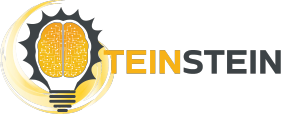

# Priority Scheduling Algorithms

**Priority scheduling** is a popular scheduling algorithm in batch systems. Each process has a priority assigned to it. The process with the highest priority will be carried out first, and so on.

Learning Outcomes:
- What is Priority scheduling?
- Types of Priority Scheduling
- Characteristics of Priority Scheduling
- Example of Priority Scheduling
- Advantages and disadvantages of priority scheduling
- Disadvantages of priority scheduling

**Priority scheduling** is a popular scheduling algorithm in batch systems. Each process has a priority assigned to it. The process with the highest priority will be carried out first, and so on.

Processes with the same priority are executed in the order in which they were received, i.e . first-come first-serve basis. Priority can be determined based on memory requirements, time constraints, or any other resource constraint.

## Characteristics of Priority Scheduling
- A CPU algorithm that schedules processes based on priority.
- It used in Operating systems for performing batch processes.
- If two jobs having the same priority are READY, it works on a FIRST COME, FIRST SERVED basis.
- In priority scheduling, a number is assigned to each process that indicates its priority level.
- Lower the number, higher is the priority.
- In this type of scheduling algorithm, if a newer process arrives, that is having a higher priority than the currently running - process, then the currently running process is preempted.

## Types of Priority Scheduling

### On the basis of preemption:

#### Preemptive Scheduling:
In Preemptive Scheduling, the tasks are mostly assigned with their priorities. Sometimes it is important to run a task with a higher priority before another lower priority task, even if the lower priority task is still running. The lower priority task holds for some time and resumes when the higher priority task finishes its execution.

In [ ]:
class Priority:
    def processData(self, no_of_processes):
        process_data = []
        for i in range(no_of_processes):
            temporary = []
            process_id = int(input("Enter Process ID: "))

            arrival_time = int(input(f"Enter Arrival Time for Process {process_id}: "))

            burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))

            priority = int(input(f"Enter Priority for Process {process_id}: "))

            temporary.extend(
                [process_id, arrival_time, burst_time, priority, 0, burst_time]
            )
            """
            '0' is the state of the process. 0 means not executed and 1 means execution complete
            """
            process_data.append(temporary)
        Priority.schedulingProcess(self, process_data)

    def schedulingProcess(self, process_data):
        start_time = []
        exit_time = []
        s_time = 0
        sequence_of_process = []
        process_data.sort(key=lambda x: x[1])
        """
        Sort processes according to the Arrival Time
        """
        while 1:
            ready_queue = []
            normal_queue = []
            temp = []
            for i in range(len(process_data)):
                if process_data[i][1] <= s_time and process_data[i][4] == 0:
                    temp.extend(
                        [
                            process_data[i][0],
                            process_data[i][1],
                            process_data[i][2],
                            process_data[i][3],
                            process_data[i][5],
                        ]
                    )
                    ready_queue.append(temp)
                    temp = []
                elif process_data[i][4] == 0:
                    temp.extend(
                        [
                            process_data[i][0],
                            process_data[i][1],
                            process_data[i][2],
                            process_data[i][4],
                            process_data[i][5],
                        ]
                    )
                    normal_queue.append(temp)
                    temp = []
            if len(ready_queue) == 0 and len(normal_queue) == 0:
                break
            if len(ready_queue) != 0:
                ready_queue.sort(key=lambda x: x[3], reverse=True)
                start_time.append(s_time)
                s_time = s_time + 1
                e_time = s_time
                exit_time.append(e_time)
                sequence_of_process.append(ready_queue[0][0])
                for k in range(len(process_data)):
                    if process_data[k][0] == ready_queue[0][0]:
                        break
                process_data[k][2] = process_data[k][2] - 1
                if (
                    process_data[k][2] == 0
                ):  # if burst time is zero, it means process is completed
                    process_data[k][4] = 1
                    process_data[k].append(e_time)
            if len(ready_queue) == 0:
                normal_queue.sort(key=lambda x: x[1])
                if s_time < normal_queue[0][1]:
                    s_time = normal_queue[0][1]
                start_time.append(s_time)
                s_time = s_time + 1
                e_time = s_time
                exit_time.append(e_time)
                sequence_of_process.append(normal_queue[0][0])
                for k in range(len(process_data)):
                    if process_data[k][0] == normal_queue[0][0]:
                        break
                process_data[k][2] = process_data[k][2] - 1
                if (
                    process_data[k][2] == 0
                ):  # if burst time is zero, it means process is completed
                    process_data[k][4] = 1
                    process_data[k].append(e_time)
        t_time = Priority.calculateTurnaroundTime(self, process_data)
        w_time = Priority.calculateWaitingTime(self, process_data)
        Priority.printData(self, process_data, t_time, w_time, sequence_of_process)

    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        for i in range(len(process_data)):
            turnaround_time = process_data[i][6] - process_data[i][5]
            """
            turnaround_time = completion_time - arrival_time
            """
            total_turnaround_time = total_turnaround_time + turnaround_time
            process_data[i].append(turnaround_time)
        average_turnaround_time = total_turnaround_time / len(process_data)
        """
        average_turnaround_time = total_turnaround_time / no_of_processes
        """
        return average_turnaround_time

    def calculateWaitingTime(self, process_data):
        total_waiting_time = 0
        for i in range(len(process_data)):
            waiting_time = process_data[i][6] - process_data[i][2]
            """
            waiting_time = turnaround_time - burst_time
            """
            total_waiting_time = total_waiting_time + waiting_time
            process_data[i].append(waiting_time)
        average_waiting_time = total_waiting_time / len(process_data)
        """
        average_waiting_time = total_waiting_time / no_of_processes
        """
        return average_waiting_time

    def printData(
        self,
        process_data,
        average_turnaround_time,
        average_waiting_time,
        sequence_of_process,
    ):
        process_data.sort(key=lambda x: x[0])
        """
        Sort processes according to the Process ID
        """
        print(
            "Process_ID  Arrival_Time  Rem_Burst_Time   Priority        Completed  Orig_Burst_Time Completion_Time  Turnaround_Time  Waiting_Time"
        )
        for i in range(len(process_data)):
            for j in range(len(process_data[i])):

                print(process_data[i][j], end="				")
            print()
        print(f"Average Turnaround Time: {average_turnaround_time}")

        print(f"Average Waiting Time: {average_waiting_time}")

        print(f"Sequence of Process: {sequence_of_process}")


if __name__ == "__main__":
    no_of_processes = int(input("Enter number of processes: "))
    priority = Priority()
    priority.processData(no_of_processes)


#### Non Preemptive Scheduling:
In this type of scheduling method, the CPU has been allocated to a specific process. The process that keeps the CPU busy, will release the CPU either by switching context or terminating. It is the only method that can be used for various hardware platforms. That's because it doesn't need special hardware (e.g., a timer) like preemptive scheduling. An example of this would be first-come-first-serve type of implementation.

##### Algorithm
    Step 1 : Input the number of processes required to be scheduled using Non-Preemptive Priority Scheduling Algorithm, burst time for each process, arrival time and there respective scheduling priority.
    Step 2 : Using enhanced bubble sort technique, sort the all given processes in ascending order according to arrival time and if two or more processes having same arrival time then processes are sorted according to their priorities (low value represents high priority) in a ready queue.
    Step 3 : Calculate the Finish Time, Turn Around Time and Waiting Time for each process which in turn help to calculate Average Waiting Time and Average Turn Around Time required by CPU to schedule given set of processes.
        Step 3.1 : for i = 0, Finish Time T 0 = Arrival Time T 0 + Burst Time T 0
        Step 3.2 : for i >= 1, Finish Time T i = Burst Time T i + Finish Time T i - 1
        Step 3.3 : for i = 0, Turn Around Time T 0 = Finish Time T 0 - Arrival Time T 0
        Step 3.4 : for i >= 1, Turn Around Time T i = Finish Time T i - Arrival Time T i
        Step 3.5 : for i = 0, Waiting Time T 0 = Turn Around Time T 0 - Burst Time T 0
        Step 3.6 : for i >= 1, Waiting Time T i = Turn Around Time T i - Burst Time T i - 1
    Step 4 : Process with less arrival time (not necessary this process will have highest priority) comes first and gets scheduled first by the CPU.
    Step 5 : Calculate the Average Waiting Time and Average Turn Around Time.
    Step 6 : Stop.

In [ ]:
class Priority:
    def processData(self, no_of_processes):
        process_data = []
        for i in range(no_of_processes):
            temporary = []
            process_id = int(input("Enter Process ID: "))

            burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))

            priority = int(input(f"Enter Priority for Process {process_id}: "))

            temporary.extend([process_id, 0, burst_time, priority])
            """
            '0' is the arrival time of the processes
            """
            process_data.append(temporary)
        Priority.schedulingProcess(self, process_data)

    def schedulingProcess(self, process_data):
        process_data.sort(key=lambda x: x[3], reverse=True)
        """
        Sort according to Priority considering Higher the Value, Higher the Priority
        """
        start_time = []
        exit_time = []
        s_time = 0
        for i in range(len(process_data)):
            start_time.append(s_time)
            s_time = s_time + process_data[i][2]
            e_time = s_time
            exit_time.append(e_time)
            process_data[i].append(e_time)
        t_time = Priority.calculateTurnaroundTime(self, process_data)
        w_time = Priority.calculateWaitingTime(self, process_data)
        Priority.printData(self, process_data, t_time, w_time)

    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        for i in range(len(process_data)):
            turnaround_time = process_data[i][4] - process_data[i][1]
            """
            turnaround_time = completion_time - arrival_time
            """
            total_turnaround_time = total_turnaround_time + turnaround_time
            process_data[i].append(turnaround_time)
        average_turnaround_time = total_turnaround_time / len(process_data)
        """
        average_turnaround_time = total_turnaround_time / no_of_processes
        """
        return average_turnaround_time

    def calculateWaitingTime(self, process_data):
        total_waiting_time = 0
        for i in range(len(process_data)):
            waiting_time = process_data[i][5] - process_data[i][2]
            """
            waiting_time = turnaround_time - burst_time
            """
            total_waiting_time = total_waiting_time + waiting_time
            process_data[i].append(waiting_time)
        average_waiting_time = total_waiting_time / len(process_data)
        """
        average_waiting_time = total_waiting_time / no_of_processes
        """
        return average_waiting_time

    def printData(self, process_data, average_turnaround_time, average_waiting_time):
        process_data.sort(key=lambda x: x[0])
        """
        Sort according to the Process ID
        """
        print(
            "Process_ID  Arrival_Time  Burst_Time       Priority  Completion_Time  Turnaround_Time  Waiting_Time"
        )

        for i in range(len(process_data)):
            for j in range(len(process_data[i])):
                print(process_data[i][j], end="\t\t\t\t")
            print()
        print(f"Average Turnaround Time: {average_turnaround_time}")

        print(f"Average Waiting Time: {average_waiting_time}")


if __name__ == "__main__":
    no_of_processes = int(input("Enter number of processes: "))
    priority = Priority()
    priority.processData(no_of_processes)

Other classifications include:

### On the basis of Execution:
#### Static priorities:
Static priorities are those priorities which we defined while creating the list of processes or you can say that the number of priority does not changes when the process of execution is going on.
#### Dynamic priorities 
Dynamic priorities are those which we defined on the basis of the behavior of the processes or you can say that the priority keeps changing itself when the process of execution is going on as per its own needs.

### On the basis of definition
#### Internally defined 
- Internally defined priorities are those which make use of any measurable unit so that they can calculate the priority of a process.
- E.g.: time limits, file requirements includes number of open files etc.. and memory requirements etc.

#### Externally defined 
- Externally defined priorities are those which make use of some criteria which is beyond our operating system. It includes the sum of resources which are being utilized for computer use, significance of process, user preference and some other factors.
- E.g.: the department which is sponsoring our work, politics, the amount of fund which is being paid for computer use and the type of fund which is being paid for computer use, process importance etc.

## Pros and Cons:

### Advantages:
- Easy to use scheduling method
- Processes are executed on the basis of priority so high priority does not need to wait for long which saves time
- This method provides a good mechanism where the relative important of each process may be precisely defined.
- Suitable for applications with fluctuating time and resource requirements.

### Disadvantages:
- If the system eventually crashes, all low priority processes get lost.
- If high priority processes take lots of CPU time, then the lower priority processes may starve and will be postponed for an indefinite time.
- This scheduling algorithm may leave some low priority processes waiting indefinitely.
- A process will be blocked when it is ready to run but has to wait for the CPU because some other process is running currently.
- If a new higher priority process keeps on coming in the ready queue, then the process which is in the waiting state may need to wait for a long duration of time.

## Important Definitions:

- Starvation: It is a state where a process is ready to be executed, but faces a long wait in getting assigned to the CPU. AKA Indefinite Blocking.
- Aging: It is a technique used to gradually increase the priority of those processes that wait for long periods in the system.